<a href="https://colab.research.google.com/github/cswcjt/Time-Series-Analysis/blob/main/Adult_Income_prediction(%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 과제1: 소득구간 예측
데이터 소개
US Census Bureau에서 수집하고 UCI에서 배포한 US Adult Income 데이터셋에 강사가 자체 제작한 모의 변수를 추가·수정한 데이터를 사용합니다.

첫번째로 사용할 데이터는 US Adult Income 데이터셋이며 분류할 타겟 레이블과 변수(피처)는 아래와 같습니다.

age : 나이
workclass: 직업구분
education: 교육수준
education.num: 교육수준(numerically coded)
marital.status: 혼인상태
occupation : 직업
relationship: 가족관계
race: 인종
sex: 성별
capital.gain: 자본이득
capital.loss: 자본손실
hours.per.week: 주당 근로시간
income : 소득 구분
원 데이터 출처: https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
datapath = 'https://github.com/mchoimis/tsdl/raw/main/income/'
df = pd.io.parsers.read_csv(datapath + 'income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 데이터 미리보기

In [ ]:
# 데이터 형태 확인

print(df.shape)
print(df.columns)
df.info()

### 데이터 전처리

In [6]:
# 결측치를 NaN으로 바꾸기
df[df=='?'] = np.nan

In [7]:
# 최빈값으로 결측치 채우기
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
# 결과 확인하기

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### training set과 test set으로 나누기


In [15]:
### 인풋 피처와 타겟값 만들기
X =  df.drop(['income', 'education', 'fnlwgt'], axis = 1)
y =  df['income']

In [16]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [17]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

###  원 데이터를 training set과 test set으로 나누기

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 22278 to 20721
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9769 non-null   int64 
 1   workclass       9769 non-null   object
 2   education.num   9769 non-null   int64 
 3   marital.status  9769 non-null   object
 4   occupation      9769 non-null   object
 5   relationship    9769 non-null   object
 6   race            9769 non-null   object
 7   sex             9769 non-null   object
 8   capital.gain    9769 non-null   int64 
 9   capital.loss    9769 non-null   int64 
 10  hours.per.week  9769 non-null   int64 
 11  native.country  9769 non-null   object
dtypes: int64(5), object(7)
memory usage: 992.2+ KB


### 범주변수 처리하기

In [20]:
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le =  preprocessing.LabelEncoder()
        X_train[feature] =  le.fit_transform(X_train[feature]) 
        X_test[feature] =   le.transform(X_test[feature]) 

In [21]:
# 변환된 범주변수 컬럼 확인하기(X_train)
X_train[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
32098,6,2,3,5,4,0,38
25206,1,2,6,0,4,1,38
23491,3,4,3,1,4,0,38


In [22]:
# 변환된 범주변수 컬럼 확인하기(X_test)
X_test[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
22278,3,6,11,4,4,0,38
8950,3,4,5,3,4,0,38
7838,3,4,7,1,1,0,39


### 참고: 범주변수의 처리
범주변수의 처리 방법은 크게 2가지로 나눌 수 있습니다.

- 클래스를 숫자로 변환
- 원-핫-인코딩(더미코딩)

### 피처 스케일 조정하기

In [23]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [24]:
# 스케일 조정된 X_train 데이터 확인하기

# X_train_head()
X_train_scaled.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


In [25]:
print(min(X_train['age']))
print(max(X_train['age']))
print(np.mean(X_train['age']))
print(np.var(X_train['age']))
print('\n')
print(min(X_test['age']))
print(max(X_test['age']))
print(np.mean(X_test['age']))
print(np.var(X_test['age']))

17
90
38.61429448929449
186.44402697680712


17
90
38.505476507319074
185.14136114309127


In [26]:
print(min(X_train_scaled['age']))
print(max(X_train_scaled['age']))
print(np.mean(X_train_scaled['age']))
print(np.var(X_train_scaled['age']))
print('\n')
print(min(X_test_scaled['age']))
print(max(X_test_scaled['age']))
print(np.mean(X_test_scaled['age']))
print(np.var(X_test_scaled['age']))

-1.5829486507307393
3.7632934651328265
1.7567165303651125e-16
1.0


-1.5829486507307393
3.7632934651328265
-0.007969414769866482
0.9930130996694361


### 참고: scikit-learn에서 제공하는 피처 스케일러(scaler)

- `StandardScaler`: 기본 스케일, 각 피처의 평균을 0, 표준편차를 1로 변환
- `RobustScaler`: 위와 유사하지만 평균 대신 중간값(median)과 일분위, 삼분위값(quartile)을 사용하여 이상치 영향을 최소화
- `MinMaxScaler`: 모든 피처의 최대치와 최소치가 각각 1, 0이 되도록 스케일 조정
- `Normalizer`: 피처(컬럼)이 아니라 row마다 정규화되며, 유클리드 거리가 1이 되도록 데이터를 조정하여 빠르게 학습할 수 있게 함

<p> 스케일 조정을 하는 이유는 데이터의 값이 너무 크거나 작을 때 학습이 제대로 되지 않을 수도 있기 때문입니다. 또한 스케일의 영향이 절대적인 분류기(예: knn과 같은 거리기반 알고리즘)의 경우, 스케일 조정을 필수적으로 검토해야 합니다.
    
<p> 반면 어떤 항목은 원본 데이터의 분포를 유지하는 것이 나을 수도 있습니다. 예를 들어, 데이터가 거의 한 곳에 집중되어 있는 feature를 표준화시켜 분포를 같게 만들었을 때, 작은 단위의 변화가 큰 차이를 나타내는 것처럼 학습될 수도 있습니다. 또한 스케일의 영향을 크게 받지 않는 분류기(예: 트리 기반 앙상블 알고리즘)를 사용할 경우에도 성능이 준수하게 나오거나 과대적합(overfitting)의 우려가 적다면 생략할 수도 있습니다.
    
<p> 스케일 조정시 유의해야할 점은 원본 데이터의 의미를 잃어버릴 수 있다는 것입니다. 최종적으로 답을 구하는 것이 목적이 아니라 모델의 해석이나 향후 다른 데이터셋으로의 응용이 더 중요할 때 원 피처에 대한 설명력을 잃어버린다면 모델 개선이 어려울 수도 있습니다. 이 점을 함께 고려하시면 좋겠습니다.

### 주요 알고리즘의 구현

### 원 데이터를 이용하여 Logistic Regression 모델 돌려보기

In [27]:
# Feature scaling 전 원본 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg =  LogisticRegression() ###
logreg.fit(X_train, y_train)

LogisticRegression()

### 원 데이터를 이용한 Logistic Regression 모델의 정확도 확인하기

In [28]:
y_pred =  logreg.predict(X_test)
# logreg_score =  accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score: 0.8057


### 스케일 조정된 데이터를 이용하여 Logistic Regression 모델 돌려보기

In [29]:
# Feature scaling 후 변환 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train) ##

LogisticRegression()

### 스케일 조정된 데이터를 이용한 Logistic Regression 모델의 정확도 확인하기

In [30]:
y_pred_scaled_data = logreg.predict(X_test_scaled)  ##
logreg_score =  accuracy_score(y_test, y_pred_scaled_data)
print('Logistic Regression (scaled data) accuracy score: {0:0.4f}'. format(logreg_score))

Logistic Regression (scaled data) accuracy score: 0.8222


In [31]:
# 예측된 값 확인하기
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [32]:
y_pred_scaled_data

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

###  스케일 조정된 데이터를 이용한 Logistic Regression 모델 분류결과 확인하기

In [33]:
from sklearn.metrics import classification_report

cm_logreg_scaled_data =  classification_report(y_test, y_pred_scaled_data) 
print(cm_logreg_scaled_data)

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



### Random Forest 모델 구현하고 정확도 확인하기

In [34]:
from sklearn.ensemble import RandomForestClassifier ## -> bagging 방식
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# 분류 모델 하이퍼 파라미터 예시
criterion='gini' # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain (정보 이득)
n_estimators=100 # The number of trees in the forest.

In [36]:
y_pred = rfc.predict(X_test) 
rfc_score =  accuracy_score(y_test, y_pred)
print('Random Forest Model accuracy score : {0:0.4f}'. format(rfc_score ))

Random Forest Model accuracy score : 0.8454


### Random Forest 모델의 Confusion Matrix 확인하기

In [37]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Binary Labels \n')
# print('Confusion Matrix for Binary Labels\n')
# print('Actual class')
# print('Predicted', '[[True Positive', 'False Positive]')
# print('         ', '[False Negative', 'True Negative]]')
print(cm)

Confusion Matrix for Binary Labels 

[[6830  580]
 [ 930 1429]]


In [38]:
# Confusion Matrix에서 Recall과 Precision 계산하기

print('\nRecall for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[0,1])
print('\nPrecision for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[1,0])
print('\nRecall for Class [>50K] = ', cm[1,1], '/' , cm[1,0] + cm[1,1])
print('\nPrecision for Class [>50K] = ', cm[1,1], '/' , cm[0,1] + cm[1,1])


Recall for Class [<=50K] =  6830 / 7410

Precision for Class [<=50K] =  6830 / 7760

Recall for Class [>50K] =  1429 / 2359

Precision for Class [>50K] =  1429 / 2009


### Random Forest 모델의 분류결과 확인하기

In [39]:
from sklearn.metrics import classification_report

cm_rfc =  classification_report(y_test, y_pred)
print(cm_rfc)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7410
        >50K       0.71      0.61      0.65      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



### Gradient Boosting 모델 구현하고 정확도 확인하기

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =  GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [41]:
y_pred =  gbc.predict(X_test)
gbc_score =  accuracy_score(y_test, y_pred)
print('Gradient Boosting accuracy score : {0:0.4f}'.format(gbc_score))

Gradient Boosting accuracy score : 0.8621


### Gradient Boosting 모델의 분류결과 확인하기

In [42]:
from sklearn.metrics import classification_report

cm_gbc =  classification_report(y_test, y_pred)
print(cm_gbc)

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



### Light GBM 구현하고 정확도 확인하기

In [43]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm =  LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
y_pred =  lgbm.predict(X_test)

lgbm_score =  accuracy_score(y_test, y_pred)
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))

LGBM Model accuracy score : 0.8677


### Light GBM 분류결과 확인하기

In [44]:
from sklearn.metrics import classification_report

cm_lgbm =  classification_report(y_test, y_pred)
print(cm_lgbm)

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7410
        >50K       0.77      0.65      0.70      2359

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



### 요약: 소득 이진분류 예측모델의 정확도 비교하기

In [45]:
print ('Accuracy Comparisons for Binary Models\n')
print ('logreg_score:', '{0:0.5f}'.format(logreg_score))
print ('rfc_score   :', '{0:0.5f}'.format(rfc_score))
print ('gbc_score   :', '{0:0.5f}'.format(gbc_score ))
print ('lgbm_score  :', '{0:0.5f}'.format(lgbm_score))

Accuracy Comparisons for Binary Models

logreg_score: 0.82219
rfc_score   : 0.84543
gbc_score   : 0.86211
lgbm_score  : 0.86774


### 최종 이진분류 모델 비교하기 -> 모델의 발전과정에 따라 성능 향상 확인 가능

In [46]:
print ('Classification Comparions for Binary Models\n')
print ('logreg_score:', '{0:0.4f}'.format(logreg_score))
print (cm_logreg_scaled_data)
print ('rfc_score   :', '{0:0.4f}'.format(rfc_score))
print (cm_rfc)
print ('gbc_score   :', '{0:0.4f}'.format(gbc_score ))
print (cm_gbc)
print ('lgbm_score  :', '{0:0.4f}'.format(lgbm_score))
print (cm_lgbm)

Classification Comparions for Binary Models

logreg_score: 0.8222
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

rfc_score   : 0.8454
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7410
        >50K       0.71      0.61      0.65      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

gbc_score   : 0.8621
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0

### 예측 결과 평가하기

#### 성능 측정과 해석(1): Accuracy, Precision, Recall
 - 정확도(**Accuracy**)
   - 예측 결과와 실제값이 동일한 건수 / 전체 데이터 수

 - 정밀도(**Precision**)
   - 모델 결과가 Positive라고 분류했을 때 실제로 Positive인 데이터들의 비율
   - TP / (FP + TP) 

 - 재현율(**Recall**)
   - 모델 결과가 Positive와 Negative로 갈린 경우 중 실제값도 Positive인 데이터의 비율
   - TP / (FN + TP)
   - 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불린다

- scikit learn에서 `accuracy_score`, `precision_score`, `recall_score` 등을 통하여 구할 수 있다

#### 성능 측정과 해석(2): F1, Confusion Matrix, AUC
- F1
    - Precision과 Recall의 조화평균
- Confusion Matrix
    - 오차행렬
- AUC (Area Under ROC Curve)
    - 종합적 판단지표
- scikit learn에서 confusion_matrix, f1_score 등을 통하여 구할 수 있다

<img src = "https://www.mdpi.com/technologies/technologies-09-00081/article_deploy/html/images/technologies-09-00081-g001.png" >

<img src = "https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg" height = 400>

<img src = "https://blog.kakaocdn.net/dn/mo0Bj/btq1TMN5sk2/vhZqoLcaPWKyaRNeg1AA71/img.png">

### 알고리즘 성과 비교

### (참고) 머신러닝 모델에서 변수의 영향력을 계산하는 방법

- 1) <b>회귀 모델의 회귀계수(Coefficients) </b>
    - X(피처)의 변량에 따라 y(타겟)의 변량이 어느 정도로 변하는지 수치화한 값
    - 변수 영향력의 방향(긍정, 부정)을 알 수 있다는 장점
    - 단점: 변수 스케일의 영향을 받기 때문에 스케일링 작업이 중요
    - scikit-learn의 `coef_` 메서드 사용


- 2) <b>트리 기반 모델의 MDI(Mean Decrease Impurity) 기반 중요도 </b>
    - 해당 피처가 모델에 적용될 때 전체적으로 분류 결과의 불순도(impurity)를 얼마나 감소시키는지를 측정
    - 불순도(impurity)의 측정 방법은 주로 entropy 혹은 Gini impurity로 계산
    - 피처가 모델이 분류를 잘 하는데 중요하게 작용할 수록 값이 커지게 됨
    - scikit-learn의 `feature_importances_` 메서드 사용


- 3) <b>치환(Permutation) 기반 중요도 </b>
    - 특정 피처의 값을 임의의 값으로 치환했을 떄 원래 데이터보다 예측 에러가 얼마나 더 커지는가를 측정 
    - 장점: 해석이 직관적이며, 계산에 시간이 오래 걸리지 않음
    - 단점: 변수간 상호의존성 때문에 특정 피처의 영향력을 과대 혹은 과소추정할 수 있음
    - scikit-learn의 `permutation_importance` 메서드 사용
    - eli5의 `PermutationImportance` 메서드 사용


- 4) <b>LGBM 모델의 분기 기반 중요도</b>
    - 기본값으로는 각 피처에서 결정을 내리기까지 분기(split)한 횟수를 나타냄
    - 파라미터 설정을 바꾸면 분기에서 얻어낸 정보 이득(gain)의 총합을 나타낼 수 있음
    - scikit-learn의 `feature_importances_` 메서드 사용
    - light gbm의 `plot_importance` 메서드 사용 


- 5) <b>XAI 커뮤니티에서 제안하는 게임이론 기반 Shapely 값</b>
    - 치환 피처 중요도(Permutation Importance)와 비슷하게 임의의 값으로 치환했을 때의 pay-off를 측정
    - 장점: 변수간 상호의존성에 영향을 받지 않으며, 계산시마다 값이 달라지지 않음, 변수 영향력의 방향(긍정, 부정)을 알 수 있음
    - 단점: 학습결과가 아니라 원 데이터에서 결정되기 때문에 아웃라이어에 약할 수 있음, 계산이 오래 걸림
    - shap의 `shap_values` 메서드 사용

각 방법론은 장단점이 뚜렷하고 계산방식이 다르므로 머신러닝 모델 해석시 상황에 맞게 적용하는 것이 중요합니다.

실제적인 응용은 문제를 풀면서 설명드리겠습니다.

In [49]:
# Random Forest 이진분류 모델의 피처 중요도 확인하기 # MDI

importances =  rfc.feature_importances_
importances 

array([0.21231596, 0.04744899, 0.14212473, 0.06697258, 0.0839382 ,
       0.12467117, 0.01856877, 0.01173104, 0.12210687, 0.04085003,
       0.1100517 , 0.01921994])

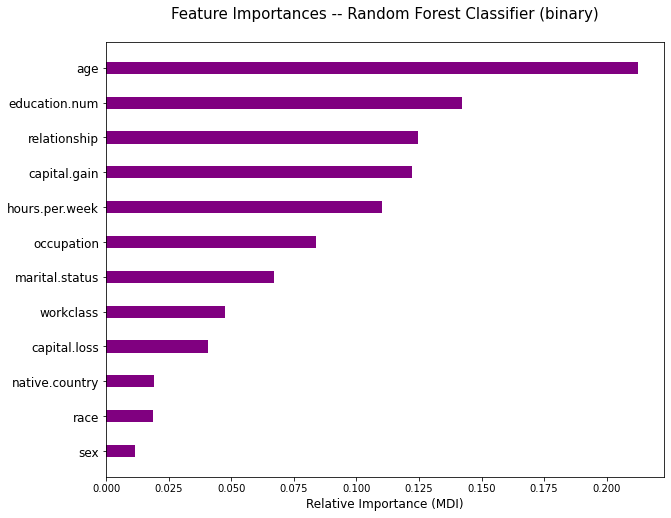

In [50]:
# Random Forest 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)     # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- Random Forest Classifier (binary)\n', fontsize=15)
plt.show()

In [51]:
# Gradient Boosting 이진분류 모델의 피처 중요도 확인하기

importances =  gbc.feature_importances_
importances  ###

array([5.87837092e-02, 5.51372125e-03, 2.10092686e-01, 4.33635936e-02,
       1.92692089e-02, 3.34389426e-01, 3.03009270e-04, 4.93262744e-03,
       2.22548066e-01, 6.02590869e-02, 3.97442162e-02, 8.00649340e-04])

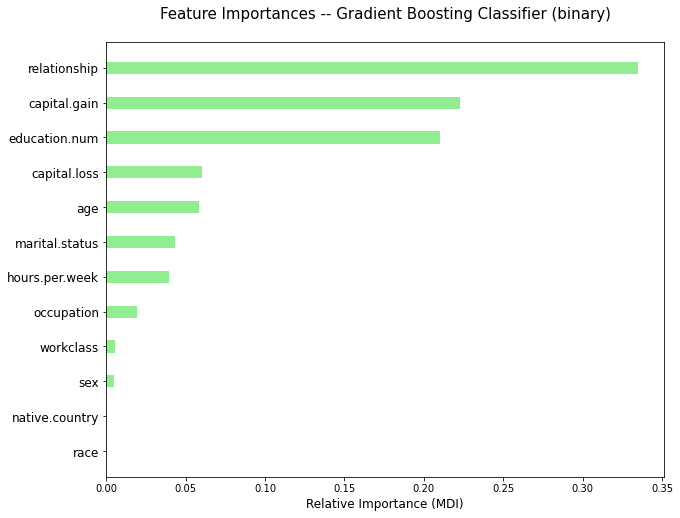

In [52]:
# Gradient Boosting 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)  # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='lightgreen', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- Gradient Boosting Classifier (binary)\n', fontsize=15)
plt.show()

In [53]:
# LightGBM 이진분류 모델의 피처 중요도 확인하기 ## 피처별 분기한 회수

importances =  lgbm.feature_importances_
importances ###

array([630, 171, 328, 170, 317, 155,  59,  55, 385, 267, 382,  81])

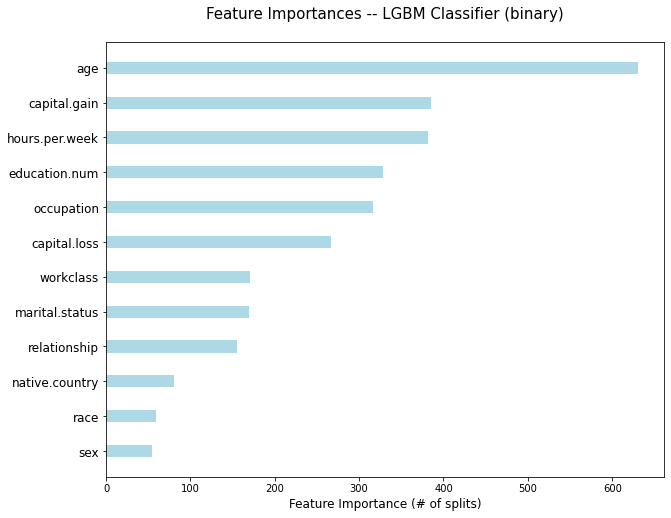

In [54]:
# LightGBM 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)   # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='lightblue', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Feature Importance (# of splits)', fontsize=12)
plt.title('Feature Importances -- LGBM Classifier (binary)\n', fontsize=15)
plt.show()

### 요약: 소득 예측 이진분류 모델 피처 중요도 비교

In [56]:
coef = sum(logreg.coef_)
coef

array([ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
       -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
        0.37244795,  0.01498249])

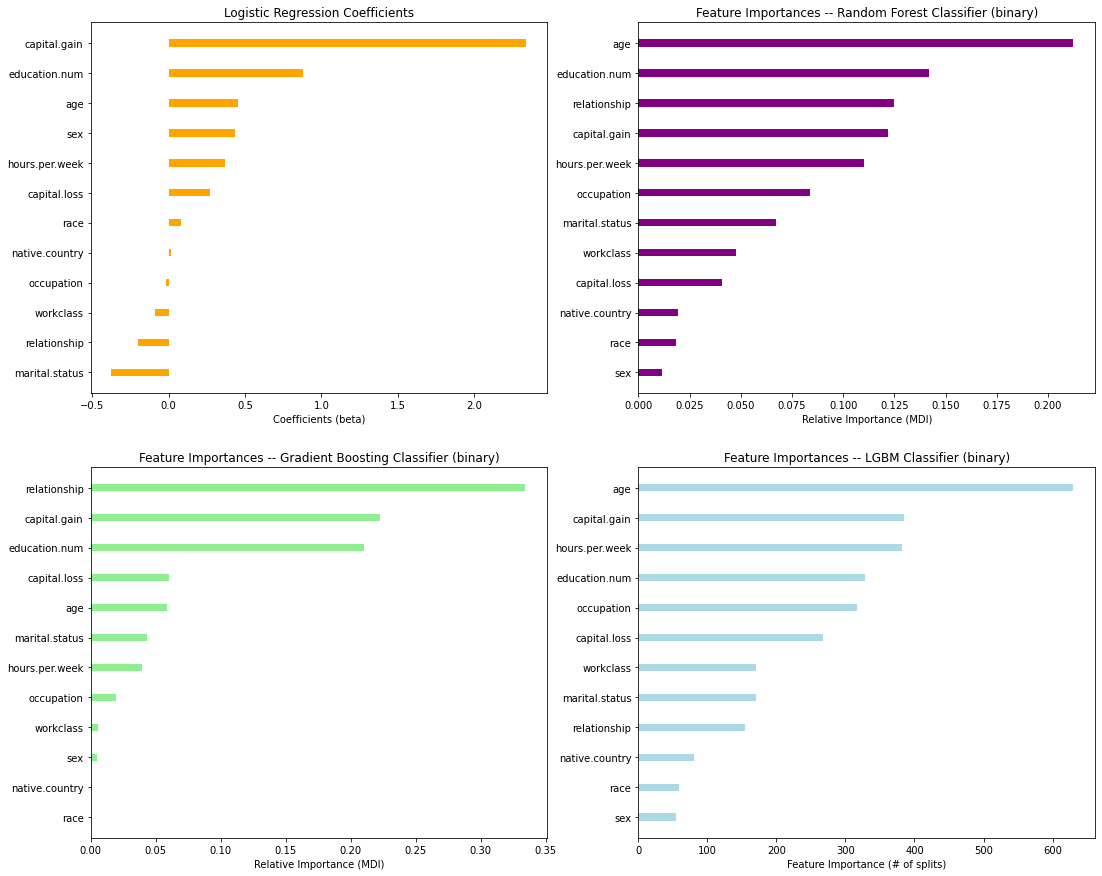

In [57]:
# subplot을 이용하여 4개 이진분류 모델(logreg, gbc, rfc, lgbm)의 회귀계수 및 피처 중요도 시각화 비교하기

plt.figure(figsize=(18, 15))

plt.subplot(2, 2, 1) 
indices_logreg = np.argsort(coef)   ###

plt.title('Logistic Regression Coefficients')
plt.barh(X_test.columns, coef[indices_logreg], .25, color='orange')
plt.yticks(X_test.columns, X_test.columns[indices_logreg])
plt.xlabel('Coefficients (beta)')

plt.subplot(2, 2, 2)
importances_rfc = rfc.feature_importances_  ###
indices_rfc = np.argsort(importances_rfc)  ###

plt.title('Feature Importances -- Random Forest Classifier (binary)')
plt.barh(X_test.columns, importances_rfc[indices_rfc], .25, color='purple')
plt.yticks(X_test.columns, X_test.columns[indices_rfc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 3)
importances_gbc = gbc.feature_importances_  ###
indices_gbc =  np.argsort(importances_gbc)  ###

plt.title('Feature Importances -- Gradient Boosting Classifier (binary)')
plt.barh(X_test.columns, importances_gbc[indices_gbc], .25, color='lightgreen')
plt.yticks(X_test.columns, X_test.columns[indices_gbc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 4)
importances_lgbm = lgbm.feature_importances_  ###
indices_lgbm = np.argsort(importances_lgbm)  ###

plt.title('Feature Importances -- LGBM Classifier (binary)')
plt.barh(X_test.columns, importances_lgbm[indices_lgbm], .25, color='lightblue')
plt.yticks(X_test.columns, X_test.columns[indices_lgbm])
plt.xlabel('Feature Importance (# of splits)')

plt.show()